# Minu esimese taseme pealkiri

## Teise taseme pealkiri

Tavaline tekst

Link https://www.markdownguide.org

(0.0, 1616899.6)

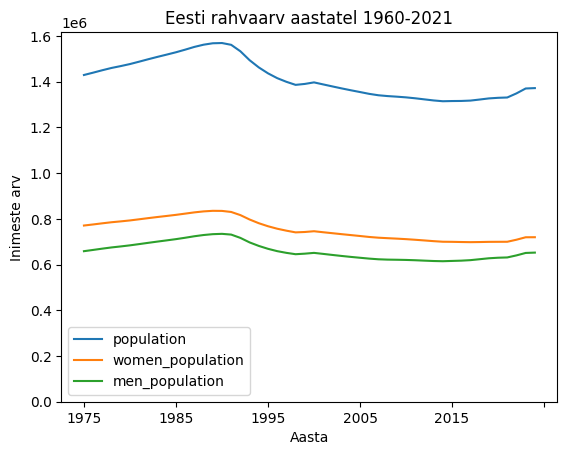

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# url = "https://demo-datahub.rik.ee/api/v1/meta/classifications"

url_riik = 'https://api.worldbank.org/v2/countries/EST/?format=json'
url_rahvastik_ = 'https://api.worldbank.org/v2/country/EST/indicator/SP.POP.TOTL?format=json'
url_women = "https://api.worldbank.org/v2/country/EST/indicator/SP.POP.TOTL.FE.IN?format=json"

response = requests.get(url_rahvastik_)
data = response.json()

response_woman = requests.get(url_women)
data_woman = response_woman.json()


# json dumps muudab väljundi terminalis loetavaks
# print(json.dumps(data, indent=2, ensure_ascii=False))

values = {'year': [], 'population': [], 'women_population': []}

# {"year": ["2021", "2020", "2019", ...], "population": [1331057, 1326535, 1324820, ...]}

for item in data[1]:
    values['year'].append(item['date'])
    values['population'].append(item['value'])

for women in data_woman[1]:
    values['women_population'].append(women['value'])

df = pd.DataFrame(values)

df = df.sort_values(by='year')  # sorteerin aasta järgi kasvavalt

df['men_population'] = df['population'] - df['women_population']


# joonistamise osa
df.plot(x='year', y=['population', 'women_population', 'men_population'], kind='line',
        title='Eesti rahvaarv aastatel 1960-2021', xlabel='Aasta', ylabel='Inimeste arv')
plt.ylim(bottom=0)  # y telje algus